# Final Modelling Process

---

This notebook contains the final modelling process for all datasets aside from Variant V (reasoning located in `Data Modelling (Variant V)` notebook. The final model was chosen to be the eighth model iteration as it performed well and consistently across all the datasets. The code for this model is detailed below.

```
model_v8 = models.Sequential()

model_v8.add(layers.Input(shape=(n_features, )))
model_v8.add(layers.Dense(32,
                          kernel_initializer='lecun_normal',
                          activation='selu',
                          kernel_regularizer=regularizers.L2()))
model_v8.add(layers.AlphaDropout(0.25))
model_v8.add(layers.Dense(16,
                          kernel_initializer='lecun_normal',
                          activation='selu',
                          kernel_regularizer=regularizers.L2()))
model_v8.add(layers.AlphaDropout(0.25))
model_v8.add(layers.Dense(8,
                          kernel_initializer='lecun_normal',
                          activation='selu',
                          kernel_regularizer=regularizers.L2()))
model_v8.add(layers.AlphaDropout(0.25))
model_v8.add(layers.Dense(4,
                          kernel_initializer='lecun_normal',
                          activation='selu',
                          kernel_regularizer=regularizers.L2()))
model_v8.add(layers.Dense(1, activation='sigmoid'))

model_v8.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['AUC',
                          tf.keras.metrics.Precision(thresholds=threshold),
                          tf.keras.metrics.Recall(thresholds=threshold),
                          FalsePositiveRate(threshold=threshold)])

model_v8_history = model_v8.fit(X_train,
                                y_train,
                                batch_size=batch_size,
                                validation_data=(X_val, y_val),
                                class_weight=class_weight,
                                epochs=epochs, 
                                verbose=0).history
```

In order to run the `final_model` class, we run the functions script and import all of the relevant data. Variables for the number of features in each data set as well as class weights for each dataset, are also instantiated.

In [1]:
%run ../functions.py

In [69]:
X_train_base_scaled = pd.read_csv('../Data/base/X_train_base_scaled.csv')
y_train_base = pd.read_csv('../Data/base/y_train_base.csv')
X_test_base_scaled = pd.read_csv('../Data/base/X_test_base_scaled.csv')
y_test_base = pd.read_csv('../Data/base/y_test_base.csv')

X_train_base_scaled_resampled = pd.read_csv('../Data/base/X_train_base_scaled_resampled.csv')
y_train_base_resampled = pd.read_csv('../Data/base/y_train_base_resampled.csv')

X_train_v1_scaled = pd.read_csv('../Data/var1/X_train_v1_scaled.csv')
y_train_v1 = pd.read_csv('../Data/var1/y_train_v1.csv')
X_test_v1_scaled = pd.read_csv('../Data/var1/X_test_v1_scaled.csv')
y_test_v1 = pd.read_csv('../Data/var1/y_test_v1.csv')

X_train_v1_scaled_resampled = pd.read_csv('../Data/var1/X_train_v1_scaled_resampled.csv')
y_train_v1_resampled = pd.read_csv('../Data/var1/y_train_v1_resampled.csv')

X_train_v2_scaled = pd.read_csv('../Data/var2/X_train_v2_scaled.csv')
y_train_v2 = pd.read_csv('../Data/var2/y_train_v2.csv')
X_test_v2_scaled = pd.read_csv('../Data/var2/X_test_v2_scaled.csv')
y_test_v2 = pd.read_csv('../Data/var2/y_test_v2.csv')

X_train_v2_scaled_resampled = pd.read_csv('../Data/var2/X_train_v2_scaled_resampled.csv')
y_train_v2_resampled = pd.read_csv('../Data/var2/y_train_v2_resampled.csv')

X_train_v3_scaled = pd.read_csv('../Data/var3/X_train_v3_scaled.csv')
y_train_v3 = pd.read_csv('../Data/var3/y_train_v3.csv')
X_test_v3_scaled = pd.read_csv('../Data/var3/X_test_v3_scaled.csv')
y_test_v3 = pd.read_csv('../Data/var3/y_test_v3.csv')

X_train_v3_scaled_resampled = pd.read_csv('../Data/var3/X_train_v3_scaled_resampled.csv')
y_train_v3_resampled = pd.read_csv('../Data/var3/y_train_v3_resampled.csv')

X_train_v4_scaled = pd.read_csv('../Data/var4/X_train_v4_scaled.csv')
y_train_v4 = pd.read_csv('../Data/var4/y_train_v4.csv')
X_test_v4_scaled = pd.read_csv('../Data/var4/X_test_v4_scaled.csv')
y_test_v4 = pd.read_csv('../Data/var4/y_test_v4.csv')

X_train_v4_scaled_resampled = pd.read_csv('../Data/var4/X_train_v4_scaled_resampled.csv')
y_train_v4_resampled = pd.read_csv('../Data/var4/y_train_v4_resampled.csv')

X_train_v5_scaled = pd.read_csv('../Data/var5/X_train_v5_scaled.csv')
y_train_v5 = pd.read_csv('../Data/var5/y_train_v5.csv')
X_test_v5_scaled = pd.read_csv('../Data/var5/X_test_v5_scaled.csv')
y_test_v5 = pd.read_csv('../Data/var5/y_test_v5.csv')

X_train_v5_scaled_resampled = pd.read_csv('../Data/var5/X_train_v5_scaled_resampled.csv')
y_train_v5_resampled = pd.read_csv('../Data/var5/y_train_v5_resampled.csv')

In [3]:
n_features_base = X_train_base_scaled_resampled.shape[1]
n_features_v1 = X_train_v1_scaled_resampled.shape[1]
n_features_v2 = X_train_v2_scaled_resampled.shape[1]
n_features_v3 = X_train_v3_scaled_resampled.shape[1]
n_features_v4 = X_train_v4_scaled_resampled.shape[1]
n_features_v5 = X_train_v5_scaled_resampled.shape[1]

class_weight_base = create_class_weight({0: len(y_train_base_resampled == 0),
                                         1: len(y_train_base_resampled == 1)})
class_weight_v1 = create_class_weight({0: len(y_train_v1_resampled == 0),
                                       1: len(y_train_v1_resampled == 1)})
class_weight_v2 = create_class_weight({0: len(y_train_v2_resampled == 0),
                                       1: len(y_train_v2_resampled == 1)})
class_weight_v3 = create_class_weight({0: len(y_train_v3_resampled == 0),
                                       1: len(y_train_v3_resampled == 1)})
class_weight_v4 = create_class_weight({0: len(y_train_v4_resampled == 0),
                                       1: len(y_train_v4_resampled == 1)})
class_weight_v5 = create_class_weight({0: len(y_train_v5_resampled == 0),
                                       1: len(y_train_v5_resampled == 1)})

In order to analyse the final model results, a class object `final_model` was created. This model is instantiated with all relevant attributes for modelling as seen below. A function `run_evaluate` is also defined in order to run the model, using the structure of the eighth model iteration, and make predictions. This function runs the model 30 times, updates list metrics, and creates useful visualizations for analysis of the model. The details of this class and function can be found in the `functions.py` script. A class object is instantiated for each dataset, aside from Variant V, below.

In [4]:
base_final_model = final_model(X_train_base_scaled_resampled,
                               y_train_base_resampled,
                               X_test_base_scaled,
                               y_test_base,
                               n_features_base,
                               class_weight_base,
                               'Final Model (Base Data)')

In [5]:
v1_final_model = final_model(X_train_v1_scaled_resampled,
                             y_train_v1_resampled,
                             X_test_v1_scaled,
                             y_test_v1,
                             n_features_v1,
                             class_weight_v1,
                             'Final Model (Variant I Data)')

In [6]:
v2_final_model = final_model(X_train_v2_scaled_resampled,
                             y_train_v2_resampled,
                             X_test_v2_scaled,
                             y_test_v2,
                             n_features_v2,
                             class_weight_v2,
                             'Final Model (Variant II Data)')

In [7]:
v3_final_model = final_model(X_train_v3_scaled_resampled,
                             y_train_v3_resampled,
                             X_test_v3_scaled,
                             y_test_v3,
                             n_features_v3,
                             class_weight_v3,
                             'Final Model (Variant III Data)')

In [8]:
v4_final_model = final_model(X_train_v4_scaled_resampled,
                             y_train_v4_resampled,
                             X_test_v4_scaled,
                             y_test_v4,
                             n_features_v4,
                             class_weight_v4,
                             'Final Model (Variant IV Data)')

---

# Final Model Results

---

Now that the model objects are instantiated, a threshold list is created, and the `run_evaluate` function is run. In order to see data for all of the thresholds, we loop over the list `thresholds`. Global variables are also created for useful metrics for later analysis. A string `z` is defined for naming the variables that will correspond to the threshold used.

The base dataset's recall scores vary between 0.069 at `t=0.5` to 0.151 at `t=0.1` based on the threshold while the false positive rates vary between 0.570 at `t=0.5` and 0.737 at `t=0.1`. It appears that as the threshold decreases, both the false positive rate and the recall increase. While increasing recall is the desired outcome, the goal is to minimize the false positive rate, or, at the very least, limit it to a certain threshold. In a real world setting, a financial institution would specify their desired false positive rate, the rate at which account applications are flagged or denied, based on their analysis of cost of client attrition. Likely, we would seek to keep the false positive rate below 10 percent in order to limit potential client attrition.

Given the nature of the variant datasets, they will follow the same trends as the base dataset. That being said, some datasets performed better than others. Details of the training can be seen below as each `run_evaluate` prints out relevant information for the current model and threshold.

In [10]:
thresholds = [0.5, 0.4, 0.3, 0.2, 0.1]

Results for Final Model (Base Data) with threshold = 0.5.


 Final Test Recall: 0.06890544343379236 

 Final Test FPR: 0.5703216829607564
0.06890544343379236 0.5703216829607564


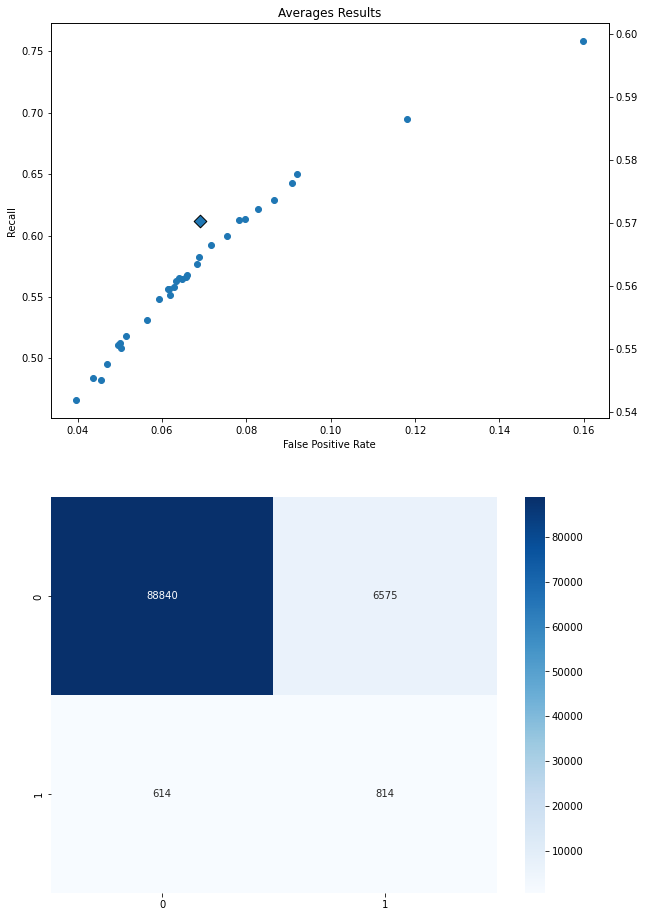

Results for Final Model (Base Data) with threshold = 0.4.


 Final Test Recall: 0.07898636342537019 

 Final Test FPR: 0.5979262724999459
0.07898636342537019 0.5979262724999459


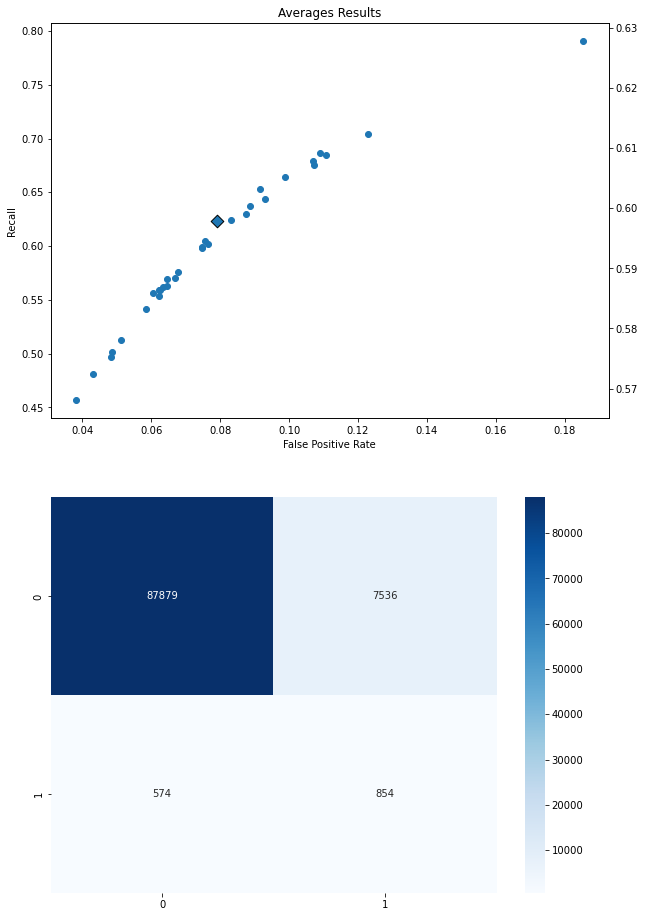

Results for Final Model (Base Data) with threshold = 0.3.


 Final Test Recall: 0.0912959182695035 

 Final Test FPR: 0.6344311891063568
0.0912959182695035 0.6344311891063568


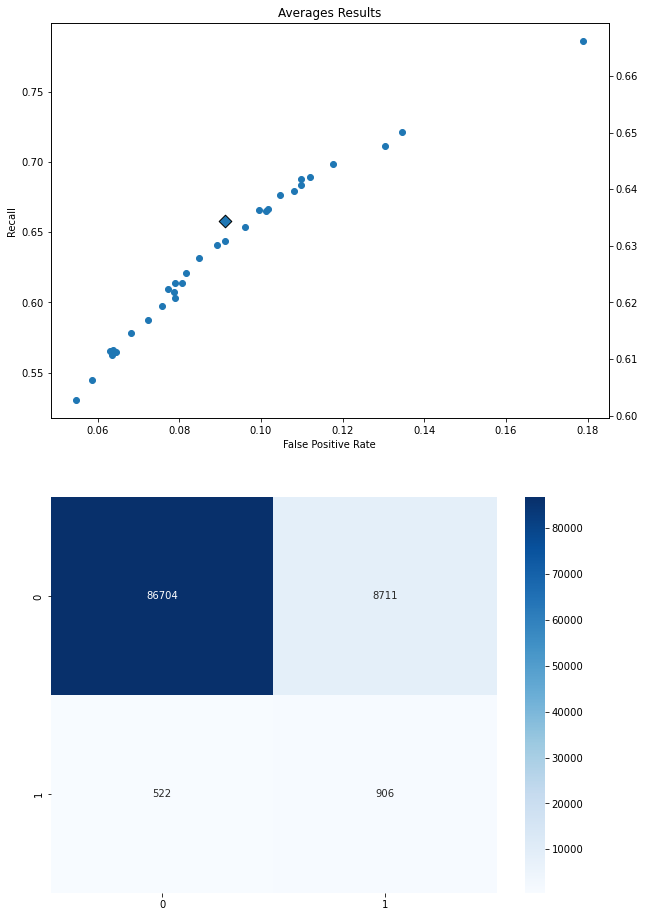

Results for Final Model (Base Data) with threshold = 0.2.


 Final Test Recall: 0.10946037067521003 

 Final Test FPR: 0.673172495057506
0.10946037067521003 0.673172495057506


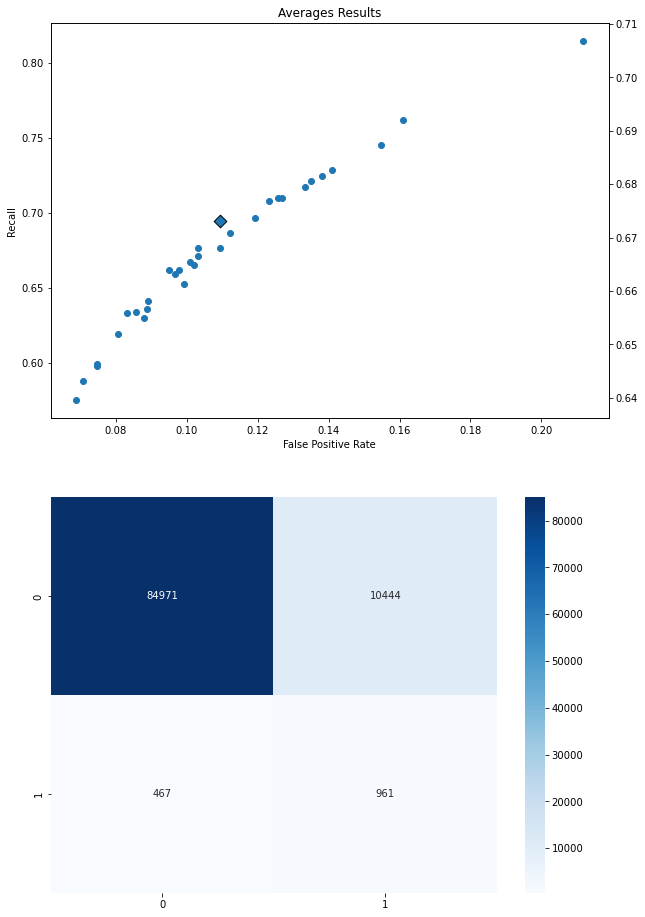

Results for Final Model (Base Data) with threshold = 0.1.


 Final Test Recall: 0.15060660219000233 

 Final Test FPR: 0.7374853145691657
0.15060660219000233 0.7374853145691657


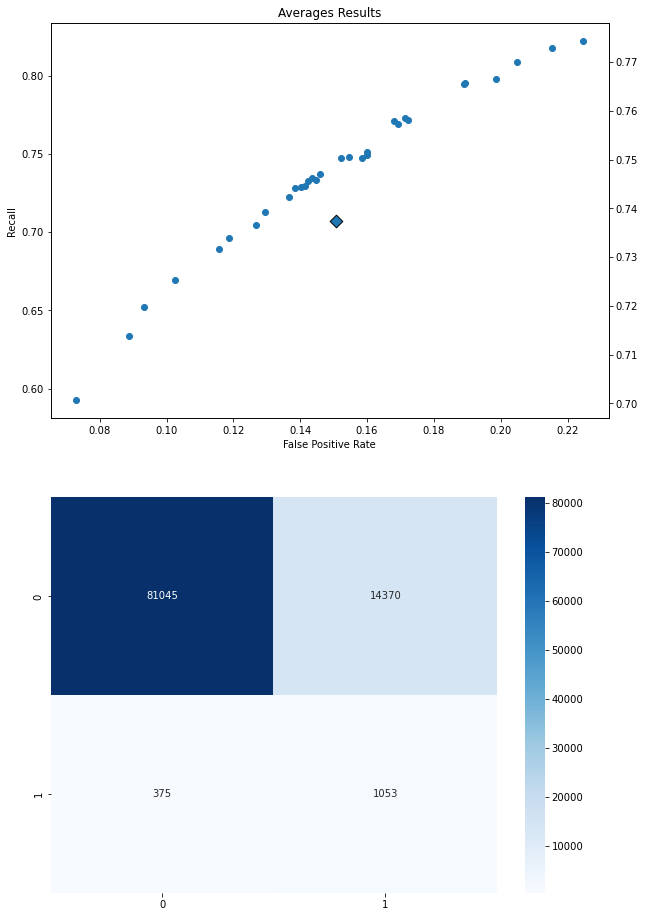

In [11]:
z='05'
for t in thresholds:
    base_final_model.run_evaluate(threshold=t)
    globals() [f'base{z}_fpr_list'] = base_final_model.fpr_list
    globals() [f'base{z}_recall_list'] = base_final_model.recall_list
    globals() [f'base{z}_cm_list'] = base_final_model.cm_list
    z='0'+str(int(z)-1)

Results for Final Model (Variant I Data) with threshold = 0.5.


 Final Test Recall: 0.06914823490285105 

 Final Test FPR: 0.5348558791222111
0.06914823490285105 0.5348558791222111


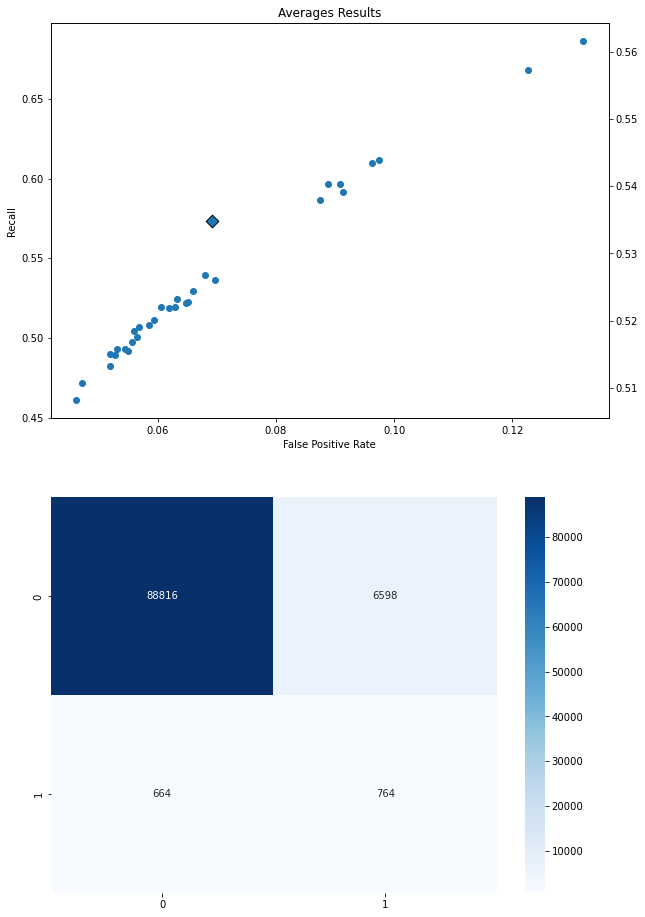

Results for Final Model (Variant I Data) with threshold = 0.4.


 Final Test Recall: 0.0943071854210669 

 Final Test FPR: 0.596277218672537
0.0943071854210669 0.596277218672537


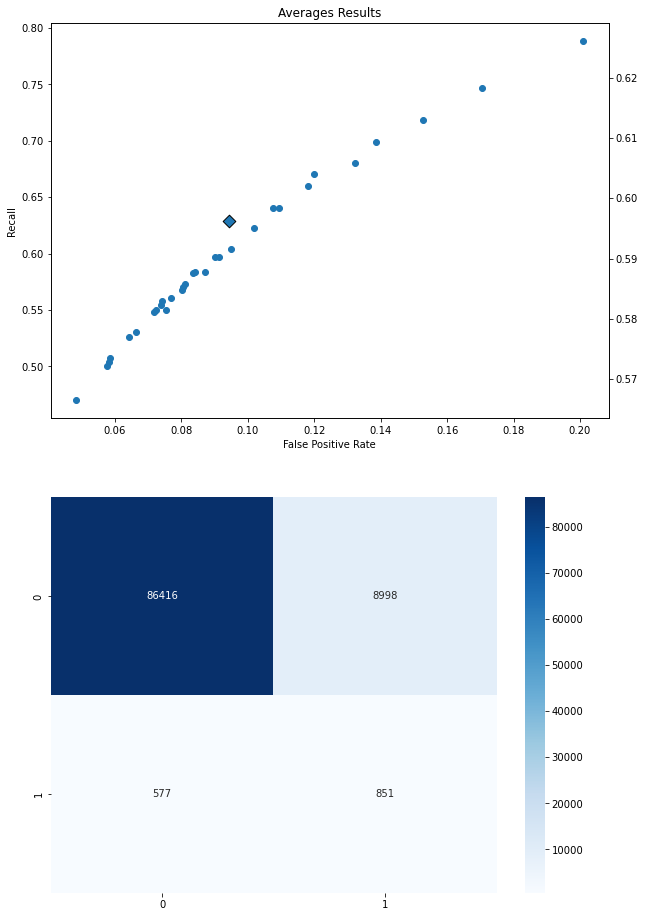

Results for Final Model (Variant I Data) with threshold = 0.3.


 Final Test Recall: 0.09763326832363682 

 Final Test FPR: 0.6056519391075257
0.09763326832363682 0.6056519391075257


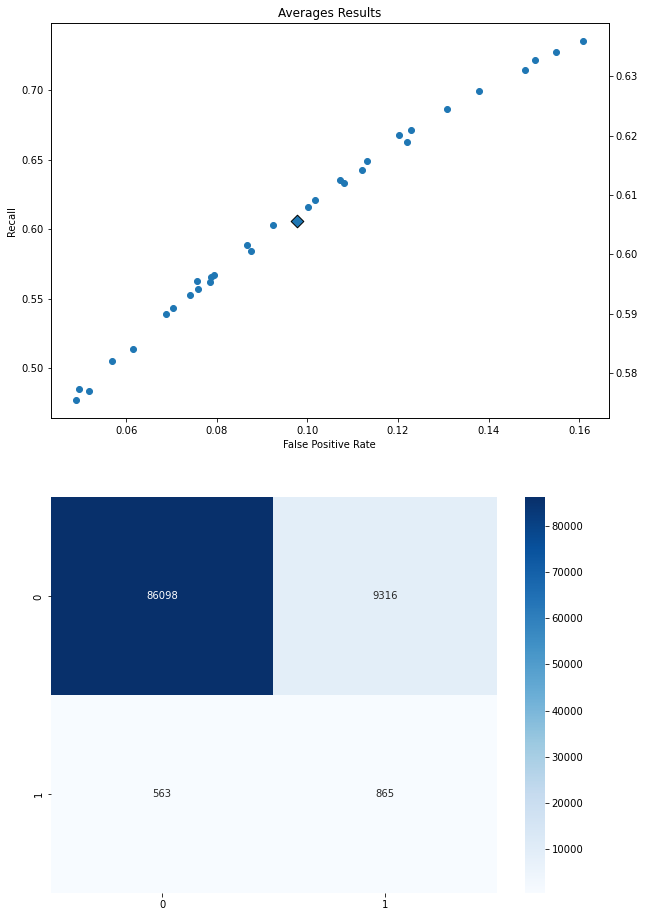

Results for Final Model (Variant I Data) with threshold = 0.2.


 Final Test Recall: 0.11320074082862946 

 Final Test FPR: 0.6410273784591306
0.11320074082862946 0.6410273784591306


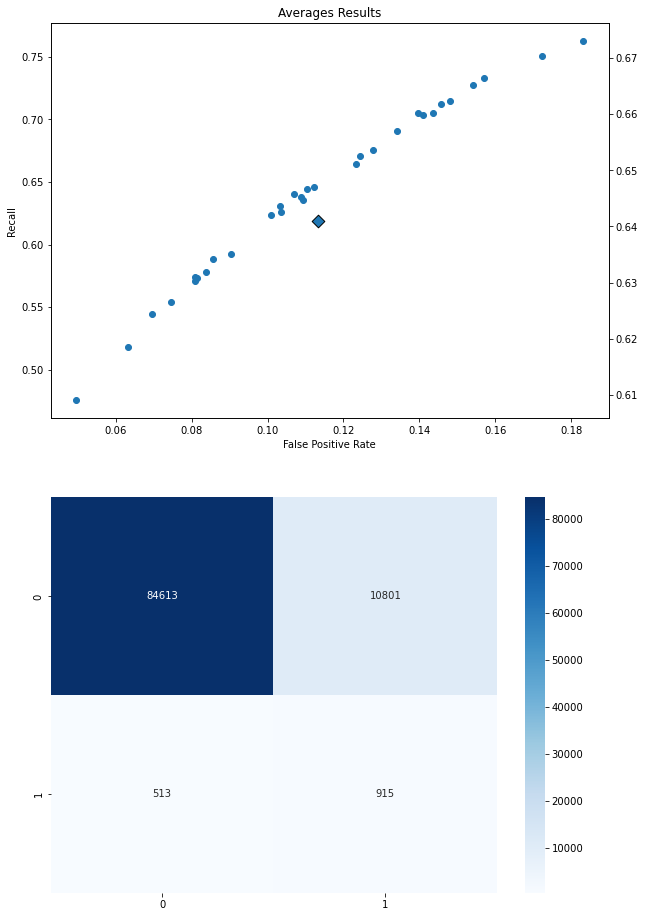

Results for Final Model (Variant I Data) with threshold = 0.1.


 Final Test Recall: 0.1563789582540912 

 Final Test FPR: 0.7180807782757667
0.1563789582540912 0.7180807782757667


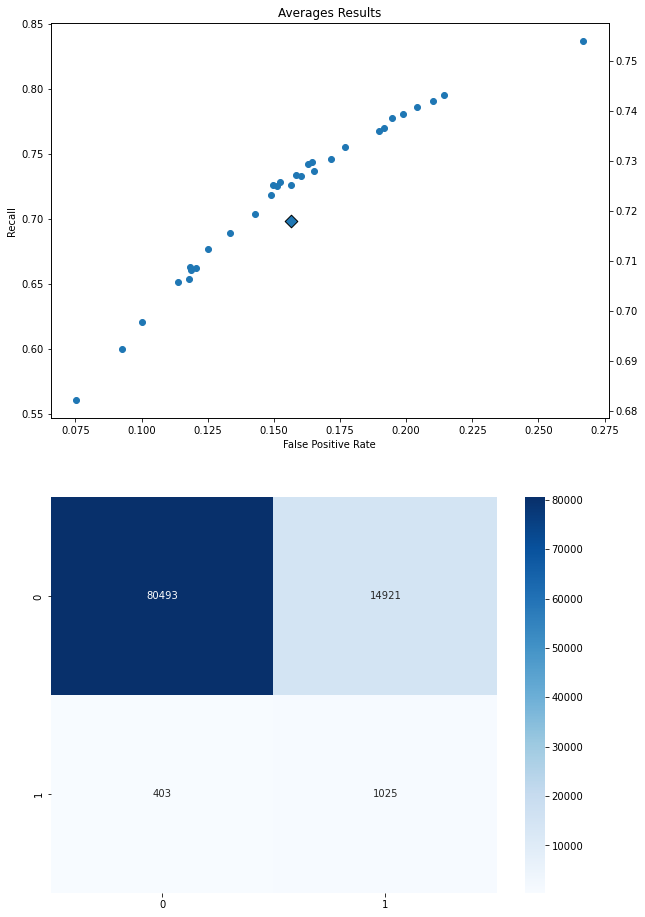

In [12]:
z='05'
for t in thresholds:
    v1_final_model.run_evaluate(threshold=t)
    globals() [f'v1{z}_fpr_list'] = v1_final_model.fpr_list
    globals() [f'v1{z}_recall_list'] = v1_final_model.recall_list
    globals() [f'v1{z}_cm_list'] = v1_final_model.cm_list
    z='0'+str(int(z)-1)

Results for Final Model (Variant II Data) with threshold = 0.5.


 Final Test Recall: 0.09162042193835782 

 Final Test FPR: 0.6238140483056346
0.09162042193835782 0.6238140483056346


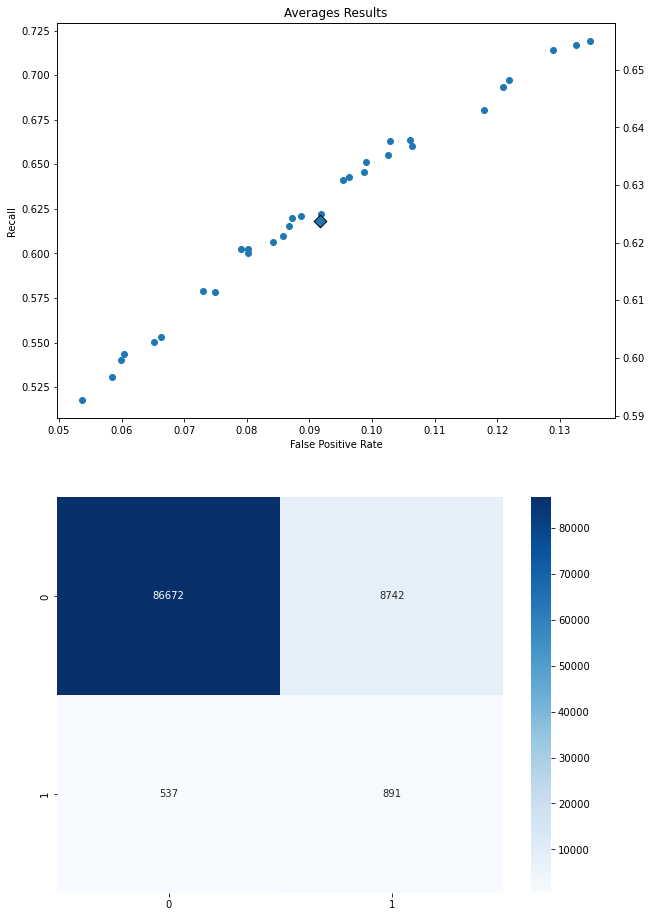

Results for Final Model (Variant II Data) with threshold = 0.4.


 Final Test Recall: 0.10141914638300095 

 Final Test FPR: 0.6493629697830446
0.10141914638300095 0.6493629697830446


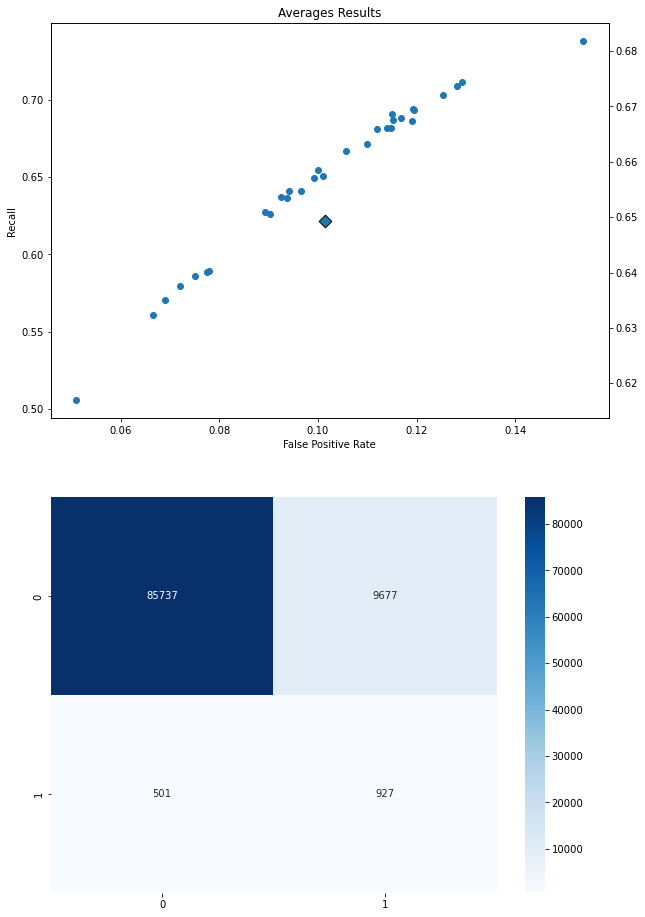

Results for Final Model (Variant II Data) with threshold = 0.3.


 Final Test Recall: 0.12648613871105255 

 Final Test FPR: 0.6924414884659552
0.12648613871105255 0.6924414884659552


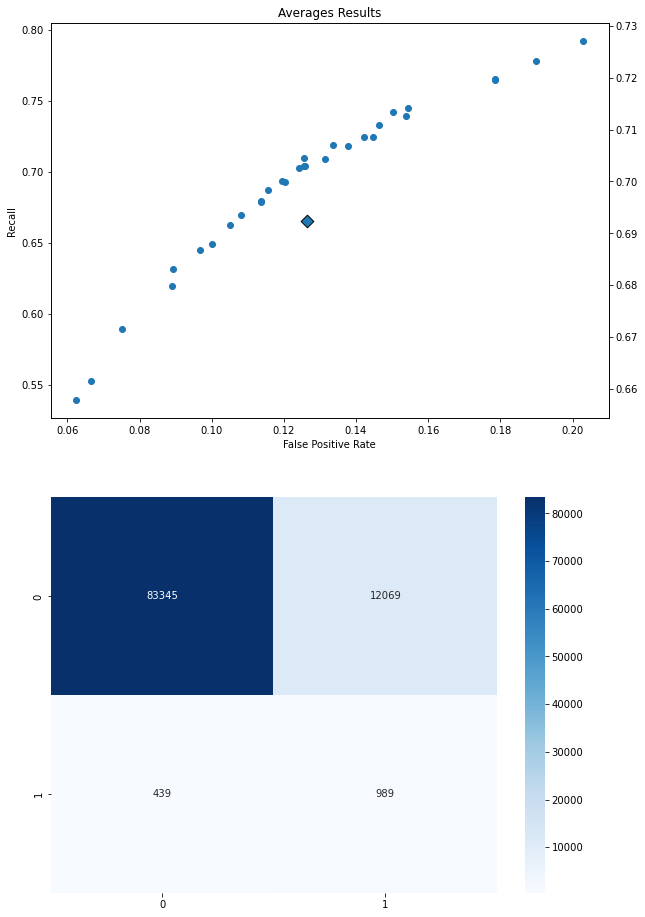

Results for Final Model (Variant II Data) with threshold = 0.2.


 Final Test Recall: 0.1306912420738128 

 Final Test FPR: 0.7007996747570653
0.1306912420738128 0.7007996747570653


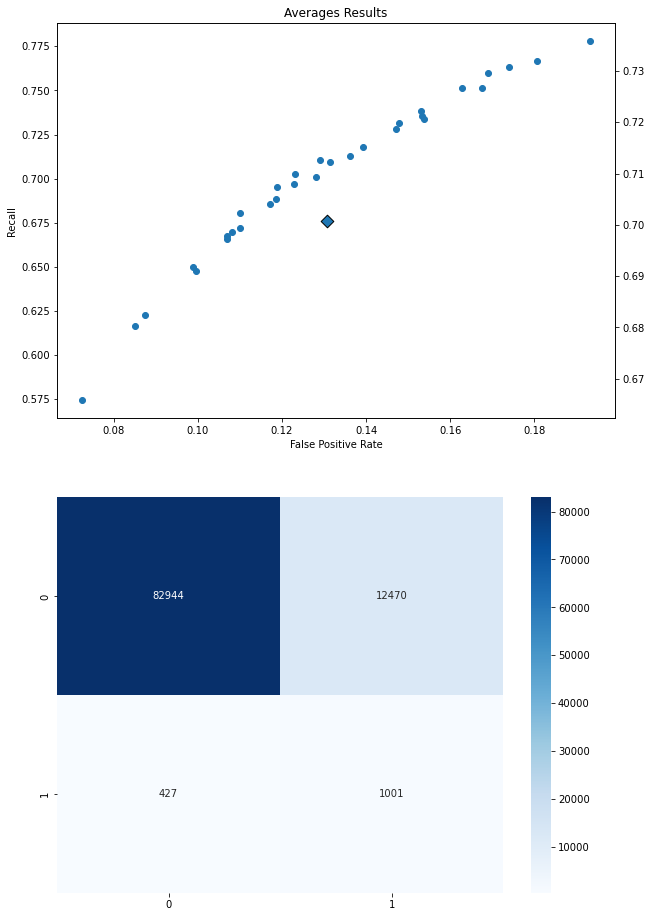

Results for Final Model (Variant II Data) with threshold = 0.1.


 Final Test Recall: 0.16002081190386125 

 Final Test FPR: 0.7394732044589135
0.16002081190386125 0.7394732044589135


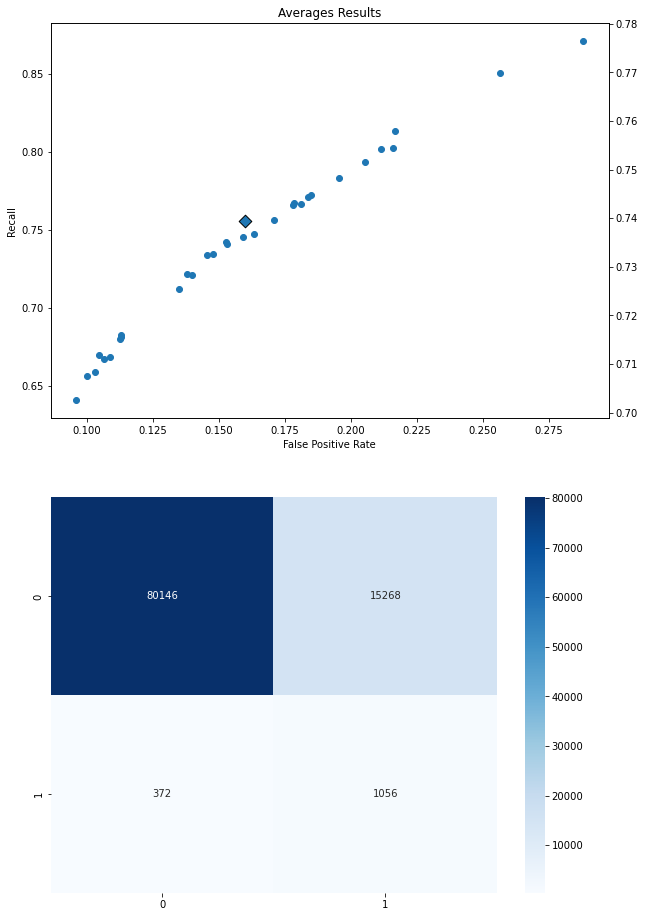

In [13]:
z='05'
for t in thresholds:
    v2_final_model.run_evaluate(threshold=t)
    globals() [f'v2{z}_fpr_list'] = v2_final_model.fpr_list
    globals() [f'v2{z}_recall_list'] = v2_final_model.recall_list
    globals() [f'v2{z}_cm_list'] = v2_final_model.cm_list
    z='0'+str(int(z)-1)

Results for Final Model (Variant III Data) with threshold = 0.5.


 Final Test Recall: 0.04379215121509567 

 Final Test FPR: 0.616312611487604
0.04379215121509567 0.616312611487604


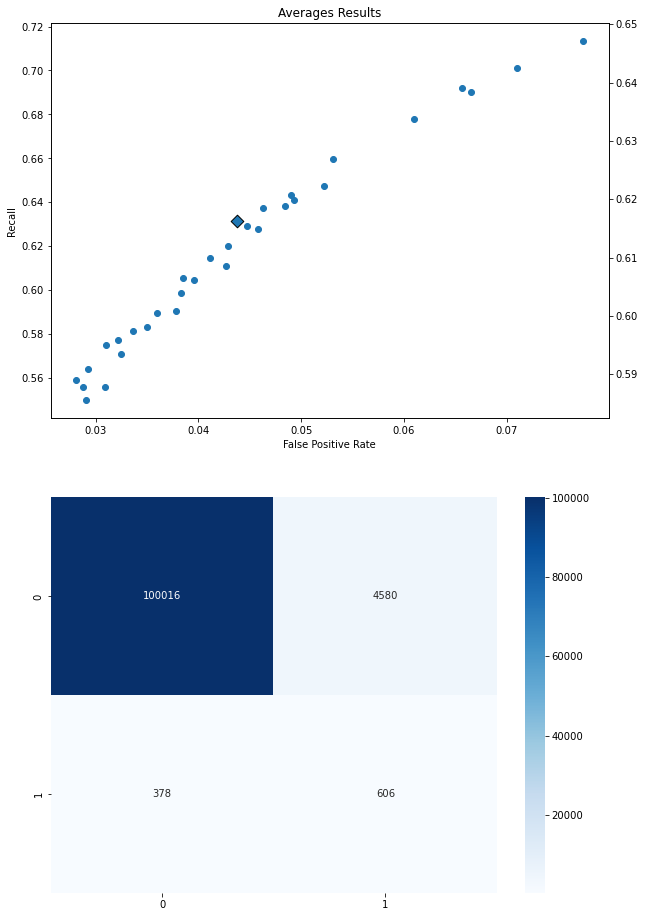

Results for Final Model (Variant III Data) with threshold = 0.4.


 Final Test Recall: 0.05893890980270601 

 Final Test FPR: 0.660536321901506
0.05893890980270601 0.660536321901506


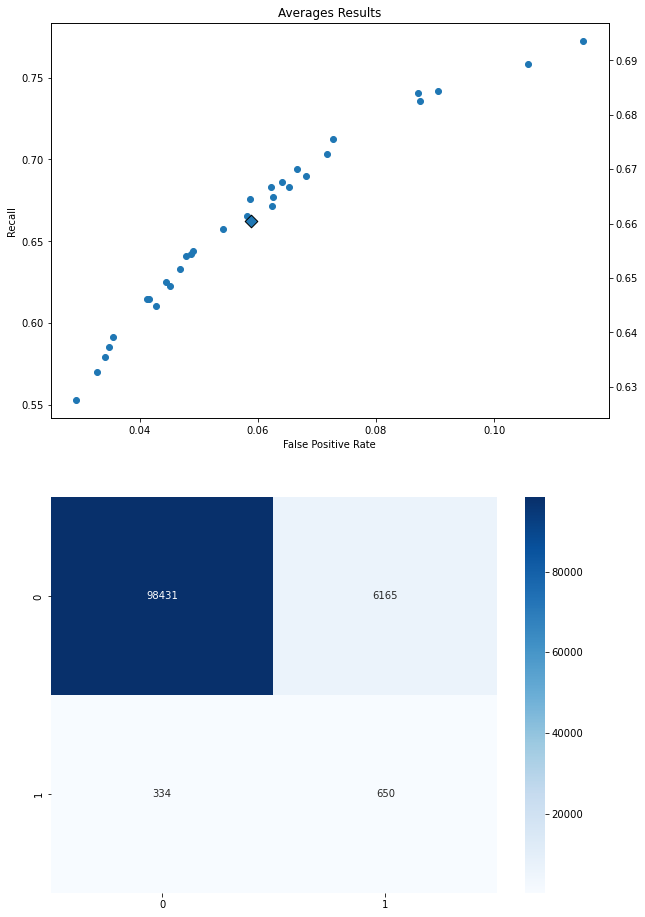

Results for Final Model (Variant III Data) with threshold = 0.3.


 Final Test Recall: 0.06636255715162523 

 Final Test FPR: 0.6744033636585358
0.06636255715162523 0.6744033636585358


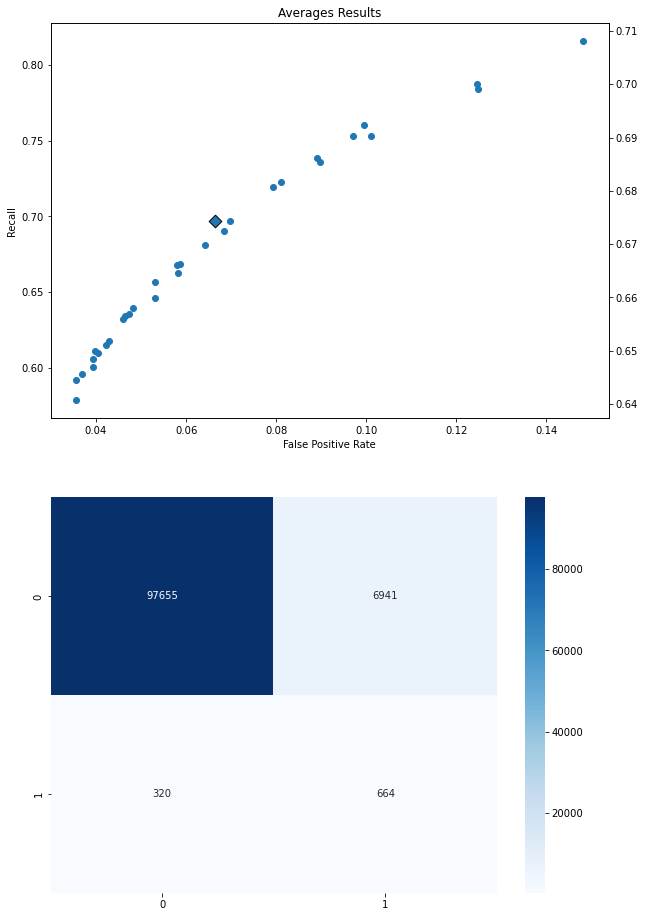

Results for Final Model (Variant III Data) with threshold = 0.2.


 Final Test Recall: 0.0705038370384324 

 Final Test FPR: 0.6896144766961375
0.0705038370384324 0.6896144766961375


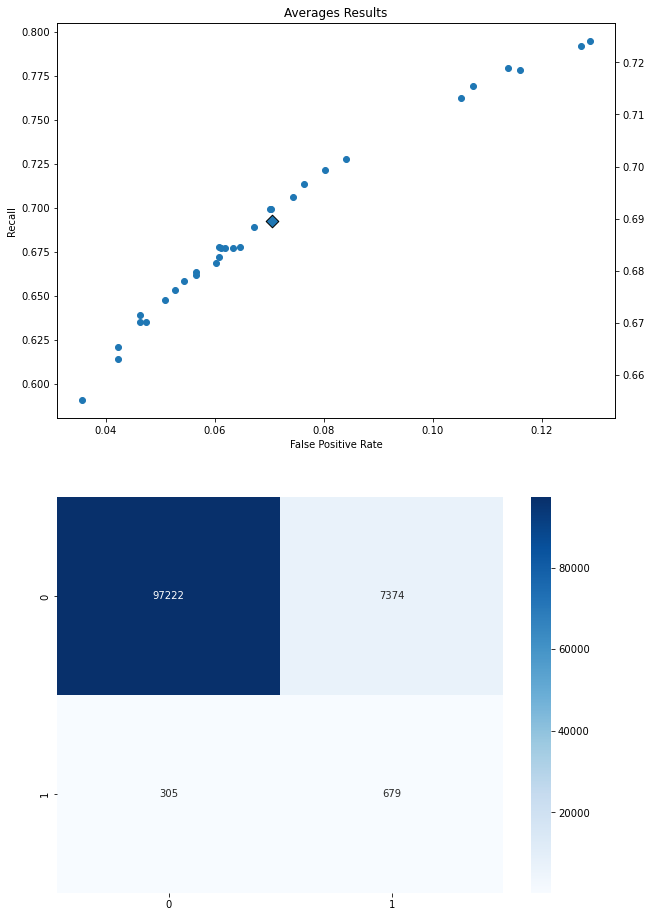

Results for Final Model (Variant III Data) with threshold = 0.1.


 Final Test Recall: 0.08984337819199409 

 Final Test FPR: 0.7285929706788832
0.08984337819199409 0.7285929706788832


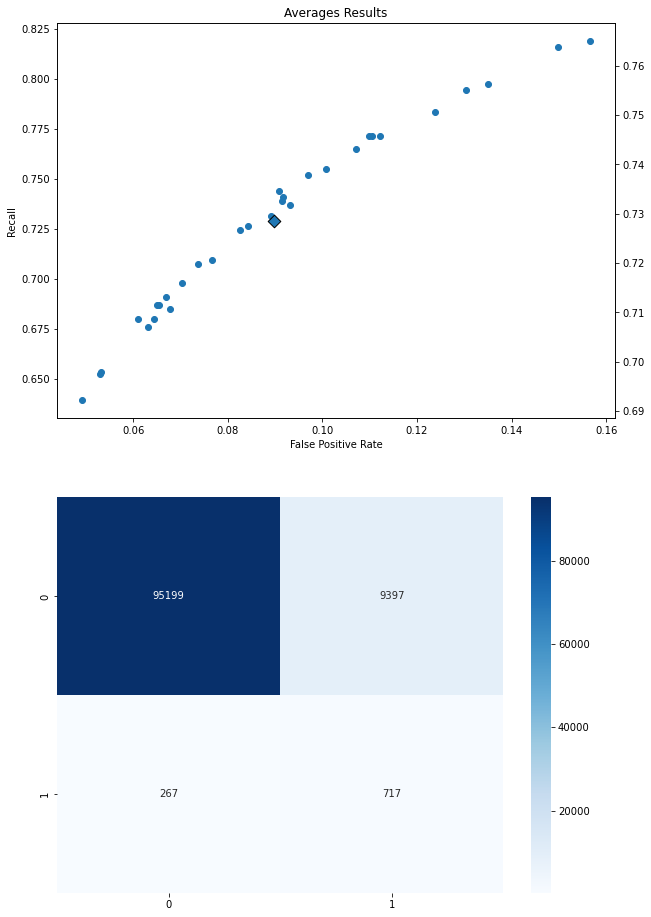

In [14]:
z='05'
for t in thresholds:
    v3_final_model.run_evaluate(threshold=t)
    globals() [f'v3{z}_fpr_list'] = v3_final_model.fpr_list
    globals() [f'v3{z}_recall_list'] = v3_final_model.recall_list
    globals() [f'v3{z}_cm_list'] = v3_final_model.cm_list
    z='0'+str(int(z)-1)

Results for Final Model (Variant IV Data) with threshold = 0.5.


 Final Test Recall: 0.10007660691776583 

 Final Test FPR: 0.5642210841178894
0.10007660691776583 0.5642210841178894


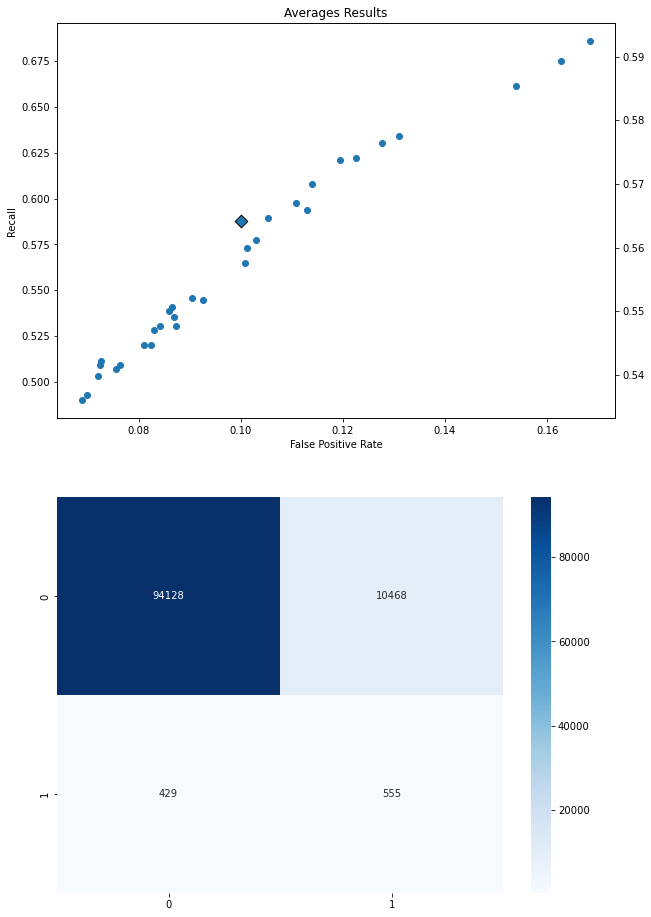

Results for Final Model (Variant IV Data) with threshold = 0.4.


 Final Test Recall: 0.10598104555279977 

 Final Test FPR: 0.5799239460499056
0.10598104555279977 0.5799239460499056


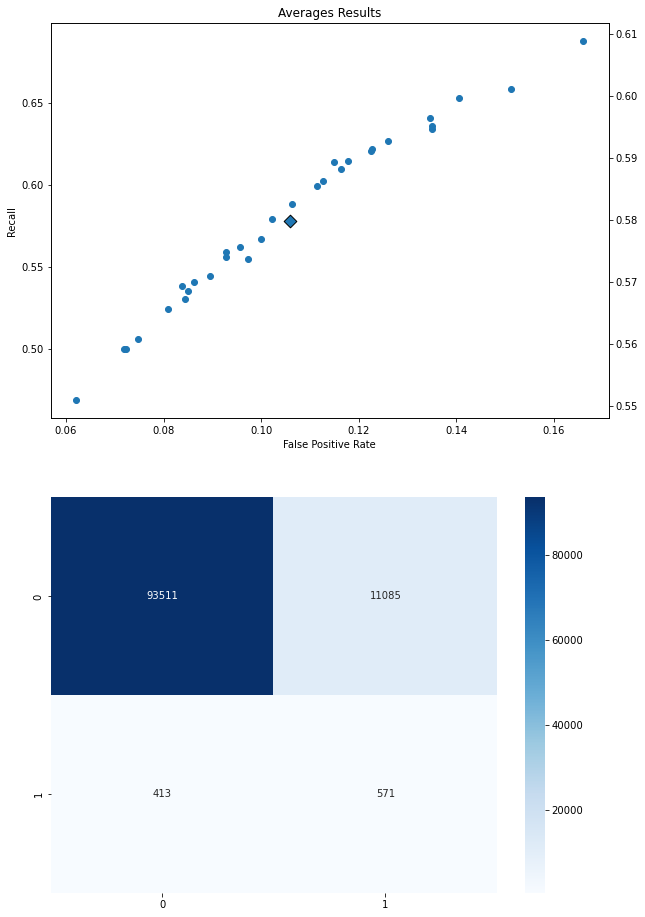

Results for Final Model (Variant IV Data) with threshold = 0.3.


 Final Test Recall: 0.11166589899409202 

 Final Test FPR: 0.5871361157586498
0.11166589899409202 0.5871361157586498


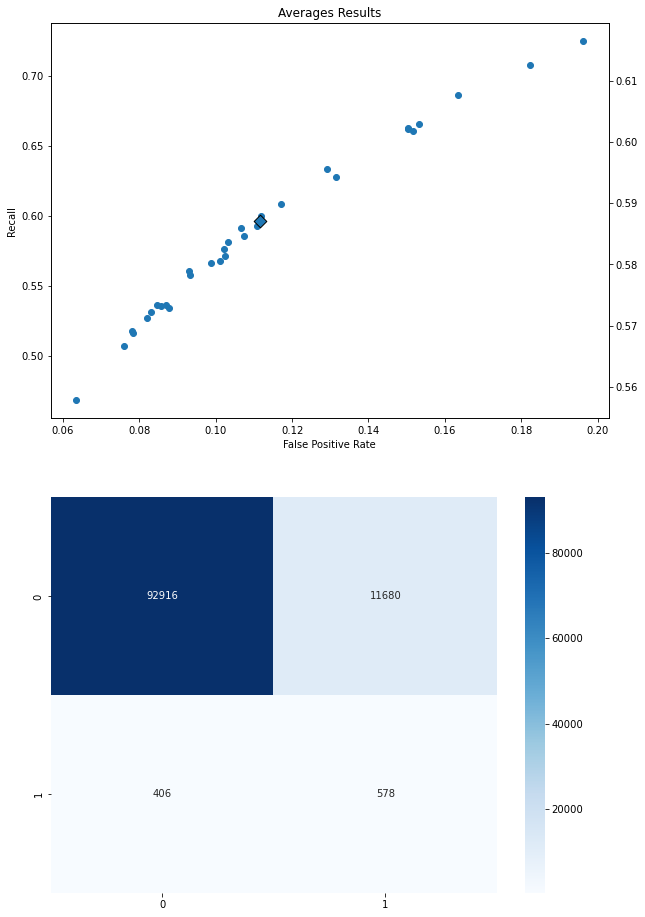

Results for Final Model (Variant IV Data) with threshold = 0.2.


 Final Test Recall: 0.1327007525870877 

 Final Test FPR: 0.6286388654862681
0.1327007525870877 0.6286388654862681


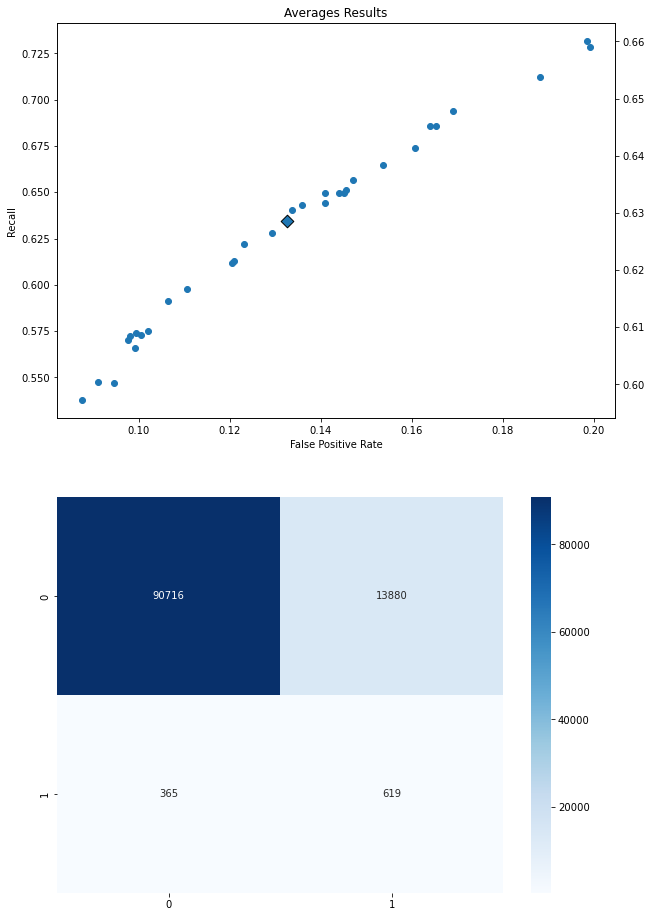

Results for Final Model (Variant IV Data) with threshold = 0.1.


 Final Test Recall: 0.15951852933053048 

 Final Test FPR: 0.6729937041959455
0.15951852933053048 0.6729937041959455


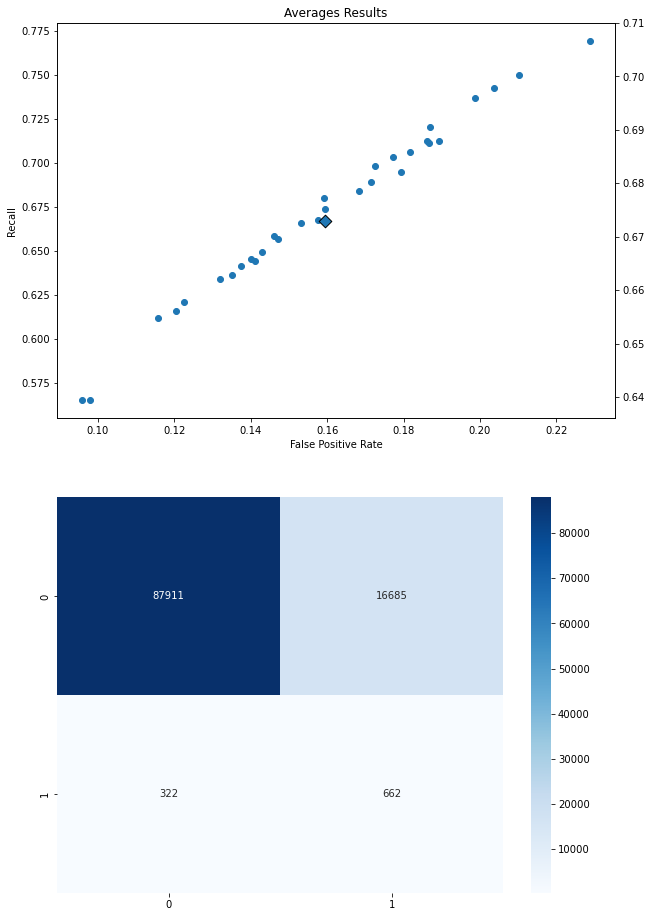

In [15]:
z='05'
for t in thresholds:
    v4_final_model.run_evaluate(threshold=t)
    globals() [f'v4{z}_fpr_list'] = v4_final_model.fpr_list
    globals() [f'v4{z}_recall_list'] = v4_final_model.recall_list
    globals() [f'v4{z}_cm_list'] = v4_final_model.cm_list
    z='0'+str(int(z)-1)

---

# Final Model Analysis

Below is the code for the creation of a final visualization for the presentation. The visualization will be discussed below.

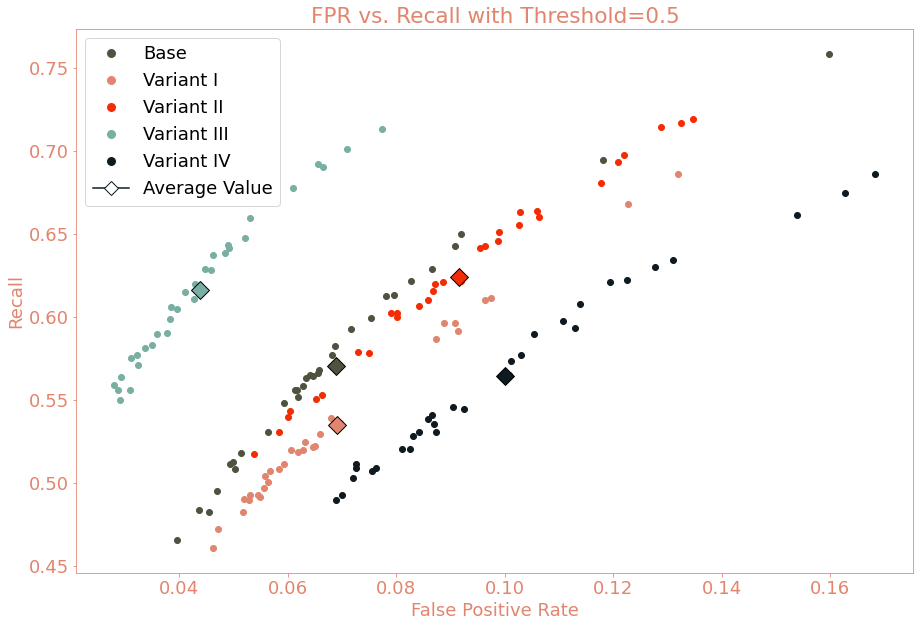

In [199]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(base05_fpr_list, base05_recall_list, color='#4E5340')
ax.scatter(np.average(base05_fpr_list),
           np.average(base05_recall_list),
           color='#4E5340',
           marker ="D",
           edgecolor ='black',
           s=160)
ax.scatter(v105_fpr_list, v105_recall_list, color='#E2856E')
ax.scatter(np.average(v105_fpr_list),
           np.average(v105_recall_list),
           color='#E2856E', 
           marker ="D",
           edgecolor ='black',
           s=160)
ax.scatter(v205_fpr_list, v205_recall_list, color='#F42C04')
ax.scatter(np.average(v205_fpr_list),
           np.average(v205_recall_list),
           color='#F42C04',
           marker ="D",
           edgecolor ='black',
           s=160)
ax.scatter(v305_fpr_list, v305_recall_list, color='#79AEA3')
ax.scatter(np.average(v305_fpr_list),
           np.average(v305_recall_list),
           color='#79AEA3',
           marker ="D",
           edgecolor ='black',
           s=160)
ax.scatter(v405_fpr_list, v405_recall_list, color='#0F1A20')
ax.scatter(np.average(v405_fpr_list),
           np.average(v405_recall_list),
           color='#0F1A20',
           marker ="D",
           edgecolor ='black',
           s=160)



ax.xaxis.label.set_color('#E2856E')
ax.yaxis.label.set_color('#E2856E')   
ax.title.set_color('#E2856E')  

ax.tick_params(axis='x', colors='#E2856E')   
ax.tick_params(axis='y', colors='#E2856E') 

ax.spines['left'].set_color('#E2856E')  
ax.spines['right'].set_color('#E2856E')       
ax.spines['top'].set_color('#E2856E')  
ax.spines['bottom'].set_color('#E2856E') 

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('Recall')
ax.set_title('FPR vs. Recall with Threshold=0.5')

legend_elements = [Line2D([0], [0],
                          marker='o',
                          color='w',
                          markerfacecolor='#4E5340',
                          label='Base',
                          markersize=10),
                   Line2D([0], [0],
                          marker='o', 
                          color='w',
                          markerfacecolor='#E2856E',
                          label='Variant I', 
                          markersize=10),
                   Line2D([0], [0],
                          marker='o',
                          color='w',
                          markerfacecolor='#F42C04',
                          label='Variant II',
                          markersize=10),
                   Line2D([0], [0],
                          marker='o', 
                          color='w',
                          markerfacecolor='#79AEA3', 
                          label='Variant III', 
                          markersize=10),
                   Line2D([0], [0],
                          marker='o',
                          color='w',
                          markerfacecolor='#0F1A20',
                          label='Variant IV',
                          markersize=10),
                    Line2D([0], [0],
                          marker='D',
                          color='#0F1A20',
                          markerfacecolor='w',
                          label='Average Value',
                          markersize=10)]

ax.legend(handles=legend_elements)

plt.savefig('../Images/fpr_v_recall.png', bbox_inches='tight');   

For the visualization above, the threshold of `t=0.5` was chosen due to the lower false positive rate for all of the variants. Variant III, the variant with better seperability for one of the groups, performed the best in terms of recall and the second best in terms of false positive rate. Overall, this variant performed the best. The seperability in this dataset was constructed using synthetic features, making a strong case for the use of synthetic features in this type of fraud detection. The only other variant that performed better than the base dataset was Variant II, the variant with higher prevalence disparity. Overall, the model performs well on data with differing levels of disparity and seperability.

Below, false positive rates and recall scores for each threshold are created using the global variables instantiated in the final model results step.

In [135]:
fpr05 = (sum([sum(base05_fpr_list)/len(base05_fpr_list),
              sum(v105_fpr_list)/len(v105_fpr_list),
              sum(v205_fpr_list)/len(v205_fpr_list),
              sum(v305_fpr_list)/len(v305_fpr_list),
              sum(v405_fpr_list)/len(v405_fpr_list)])/5)*100

fpr04 = (sum([sum(base04_fpr_list)/len(base04_fpr_list),
              sum(v104_fpr_list)/len(v104_fpr_list),
              sum(v204_fpr_list)/len(v204_fpr_list),
              sum(v304_fpr_list)/len(v304_fpr_list),
              sum(v404_fpr_list)/len(v404_fpr_list)])/5)*100

fpr03 = (sum([sum(base03_fpr_list)/len(base03_fpr_list),
              sum(v103_fpr_list)/len(v103_fpr_list),
              sum(v203_fpr_list)/len(v203_fpr_list),
              sum(v303_fpr_list)/len(v303_fpr_list),
              sum(v403_fpr_list)/len(v403_fpr_list)])/5)*100

fpr02 = (sum([sum(base02_fpr_list)/len(base02_fpr_list),
              sum(v102_fpr_list)/len(v102_fpr_list),
              sum(v202_fpr_list)/len(v202_fpr_list),
              sum(v302_fpr_list)/len(v302_fpr_list),
              sum(v402_fpr_list)/len(v402_fpr_list)])/5)*100

fpr01 = (sum([sum(base01_fpr_list)/len(base01_fpr_list),
              sum(v101_fpr_list)/len(v101_fpr_list),
              sum(v201_fpr_list)/len(v201_fpr_list),
              sum(v301_fpr_list)/len(v301_fpr_list),
              sum(v401_fpr_list)/len(v401_fpr_list)])/5)*100

In [136]:
recall05 = (sum([sum(base05_recall_list)/len(base05_recall_list),
              sum(v105_recall_list)/len(v105_recall_list),
              sum(v205_recall_list)/len(v205_recall_list),
              sum(v305_recall_list)/len(v305_recall_list),
              sum(v405_recall_list)/len(v405_recall_list)])/5)*100

recall04 = (sum([sum(base04_recall_list)/len(base04_recall_list),
              sum(v104_recall_list)/len(v104_recall_list),
              sum(v204_recall_list)/len(v204_recall_list),
              sum(v304_recall_list)/len(v304_recall_list),
              sum(v404_recall_list)/len(v404_recall_list)])/5)*100

recall03 = (sum([sum(base03_recall_list)/len(base03_recall_list),
              sum(v103_recall_list)/len(v103_recall_list),
              sum(v203_recall_list)/len(v203_recall_list),
              sum(v303_recall_list)/len(v303_recall_list),
              sum(v403_recall_list)/len(v403_recall_list)])/5)*100

recall02 = (sum([sum(base02_recall_list)/len(base02_recall_list),
              sum(v102_recall_list)/len(v102_recall_list),
              sum(v202_recall_list)/len(v202_recall_list),
              sum(v302_recall_list)/len(v302_recall_list),
              sum(v402_recall_list)/len(v402_recall_list)])/5)*100

recall01 = (sum([sum(base01_recall_list)/len(base01_recall_list),
              sum(v101_recall_list)/len(v101_recall_list),
              sum(v201_recall_list)/len(v201_recall_list),
              sum(v301_recall_list)/len(v301_recall_list),
              sum(v401_recall_list)/len(v401_recall_list)])/5)*100

Below is the creation of a visualization for the presentation. The visualization shows the average false positive rate and recall between all of the datasets for each threshold value.

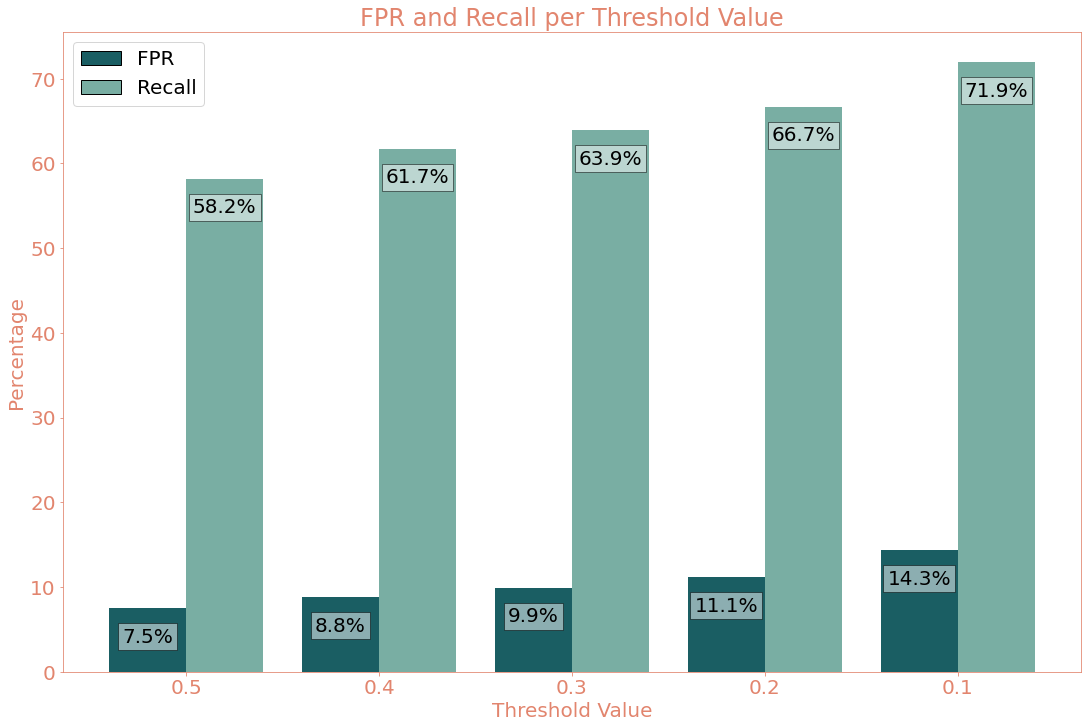

In [202]:
from matplotlib.patches import Patch

plt.rcParams.update({'font.size': 20})

threshold = ["0.5", "0.4", "0.3", "0.2", "0.1"]
metrics = {
    'FPR': (fpr05, fpr04, fpr03, fpr02, fpr01),
    'Recall': (recall05, recall04, recall03, recall02, recall01)
}

x = np.arange(len(threshold))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0
colors = ['#1A5E63','#79AEA3']

fig, ax = plt.subplots(constrained_layout=True, figsize=(15,10))

for attribute, measurement in metrics.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[multiplier])
    xlocs, xlabs = plt.xticks()
    multiplier += 1
    
    for i, j in enumerate(measurement):
        plt.text(xlocs[i]+offset+1,
                 j-4,
                 ((str(round(j,1)))+'%'),
                 ha ='center',
                 bbox = dict(facecolor = 'white', alpha = .5))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Threshold Value')
ax.set_ylabel('Percentage')
ax.set_title('FPR and Recall per Threshold Value')
plt.xticks(x+0.5*width, threshold)

legend_elements = [Patch(facecolor='#1A5E63',
                         edgecolor='black',
                         label='FPR'),
                   Patch(facecolor='#79AEA3', 
                         edgecolor='black',
                         label='Recall')]

ax.legend(handles=legend_elements)

ax.xaxis.label.set_color('#E2856E')
ax.yaxis.label.set_color('#E2856E')   
ax.title.set_color('#E2856E')  

ax.tick_params(axis='x', colors='#E2856E')   
ax.tick_params(axis='y', colors='#E2856E') 

ax.spines['left'].set_color('#E2856E')  
ax.spines['right'].set_color('#E2856E')       
ax.spines['top'].set_color('#E2856E')  
ax.spines['bottom'].set_color('#E2856E')  

plt.savefig('../Images/fpr_recall_by_threshold.png', bbox_inches='tight');   

The above visualization gives a clear picture of the relationship between threshold and false positive rate/recall. It is clearly visible that as the threshold value decreases, the false positive rate and recall increase. When considering a threshold value to choose, this analysis may provide most useful if the attributes of the unseen data are unknown. Taking the average false positive rate into account, in order to average a FPR of less than 10percent the ideal thresholds would be between 0.3 and 0.5. If staying under the threshold of 10 percent is the goal, then being more conservative with the threshold and using a threshold of 0.5 would be best advised considering that this plot only shows the average of the FPR.

---